## In this project  i am going to do analysis of Adidas sales for various outlets and Region.

The key objectives of this project are:


1. Which is the Retailer and Region with Most Sales
2. Sales Method with the highest units sold
3. The top Selling Products
4. Number of products Sold by each Retailer
5. Extracting Trends in terms of Sales on the weekend vs the weekdays in both years
6. The Total Sales Trends by month comparison for 2020 and 2021

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import calendar

In [2]:
adidas_sales = pd.read_excel("ADIDAS SALES/Adidas US Sales Datasets.xlsx",skiprows=4) #loading the dataset

In [3]:
adidas_sales.head()

,Unnamed: 0,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,NaN,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,NaN,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,NaN,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,NaN,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,NaN,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store


In [4]:
#dropping the column that contains "Unnamed" in column name
adidas_sales = adidas_sales.loc[:, ~adidas_sales.columns.str.contains('^Unnamed')]

In [5]:
adidas_sales.head(10)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store
5,Foot Locker,1185732,2020-01-06,Northeast,New York,New York,Women's Apparel,50.0,1000,500000.0,125000.0,0.25,In-store
6,Foot Locker,1185732,2020-01-07,Northeast,New York,New York,Men's Street Footwear,50.0,1250,625000.0,312500.0,0.50,In-store
7,Foot Locker,1185732,2020-01-08,Northeast,New York,New York,Men's Athletic Footwear,50.0,900,450000.0,135000.0,0.30,Outlet
8,Foot Locker,1185732,2020-01-21,Northeast,New York,New York,Women's Street Footwear,40.0,950,380000.0,133000.0,0.35,Outlet
9,Foot Locker,1185732,2020-01-22,Northeast,New York,New York,Women's Athletic Footwear,45.0,825,371250.0,129937.5,0.35,Outlet


In [6]:
adidas_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Retailer          9648 non-null   object        
 1   Retailer ID       9648 non-null   int64         
 2   Invoice Date      9648 non-null   datetime64[ns]
 3   Region            9648 non-null   object        
 4   State             9648 non-null   object        
 5   City              9648 non-null   object        
 6   Product           9648 non-null   object        
 7   Price per Unit    9648 non-null   float64       
 8   Units Sold        9648 non-null   int64         
 9   Total Sales       9648 non-null   float64       
 10  Operating Profit  9648 non-null   float64       
 11  Operating Margin  9648 non-null   float64       
 12  Sales Method      9648 non-null   object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(6)
memory usage: 980.0+ KB


In [7]:
adidas_sales.shape

(9648, 13)

In [8]:
#Checking for null values in the data set and doing a summation
adidas_sales.isnull().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [9]:
#Extracting month from the invoice date
adidas_sales['month'] = pd.DatetimeIndex(adidas_sales['Invoice Date']).month

In [10]:
adidas_sales.sample(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,month
7206,West Gear,1185732,2021-03-20,Northeast,Maryland,Baltimore,Women's Athletic Footwear,29.0,7,203.0,93.38,0.46,Online,3
724,Foot Locker,1185732,2020-08-14,Southeast,Florida,Miami,Women's Street Footwear,35.0,800,280000.0,70000.00,0.25,In-store,8
1504,Kohl's,1185732,2021-01-14,Northeast,New York,Albany,Men's Athletic Footwear,40.0,600,240000.0,72000.00,0.30,In-store,1


In [11]:
#Extracting month from the invoice date
adidas_sales['month'] = pd.DatetimeIndex(adidas_sales['Invoice Date']).month

#Extracting the year from the invoice cloumn
adidas_sales['Year'] = pd.DatetimeIndex(adidas_sales['Invoice Date']).year


In [12]:
#generating sample of the dataframe to check on the years and month columns
adidas_sales.sample(3)

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,month,Year
4044,West Gear,1128299,2020-12-23,West,California,San Francisco,Men's Apparel,62.0,145,8990.0,5663.7,0.63,Online,12,2020
2759,West Gear,1197831,2021-06-21,South,Oklahoma,Oklahoma City,Women's Street Footwear,40.0,325,130000.0,52000.0,0.40,Online,6,2021
988,Sports Direct,1197831,2021-05-05,South,Tennessee,Knoxville,Women's Street Footwear,40.0,525,210000.0,94500.0,0.45,Outlet,5,2021


In [13]:
#Counting of nun unique values in the dataframe
adidas_sales.nunique()

Retailer               6
Retailer ID            4
Invoice Date         724
Region                 5
State                 50
City                  52
Product                6
Price per Unit       146
Units Sold           361
Total Sales         3512
Operating Profit    6510
Operating Margin     127
Sales Method           3
month                 12
Year                   2
dtype: int64

In [14]:
adidas_sales.describe()

,Retailer ID,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,month,Year
count,9.648000e+03,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000,9648.000000
mean,1.173850e+06,45.216625,256.930037,93273.437500,34425.244761,0.422991,6.458126,2020.865050
std,2.636038e+04,14.705397,214.252030,141916.016727,54193.113713,0.097197,3.454799,0.341688
min,1.128299e+06,7.000000,0.000000,0.000000,0.000000,0.100000,1.000000,2020.000000
25%,1.185732e+06,35.000000,106.000000,4254.500000,1921.752500,0.350000,3.000000,2021.000000
50%,1.185732e+06,45.000000,176.000000,9576.000000,4371.420000,0.410000,6.000000,2021.000000
75%,1.185732e+06,55.000000,350.000000,150000.000000,52062.500000,0.490000,9.000000,2021.000000
max,1.197831e+06,110.000000,1275.000000,825000.000000,390000.000000,0.800000,12.000000,2021.000000


### Retailer with Most sales

In [48]:
adidas_sales_sorted = (adidas_sales.groupby('Retailer')['Total Sales'].sum().sort_values(ascending = False)/1000000).round(2)
#converting the adidas_sales_sorted from a series to a data frame and converting the variables intgo indexes
df = pd.DataFrame({'Retailer': adidas_sales_sorted.index, 'Total Sales': adidas_sales_sorted.values})
df

,Retailer,Total Sales
0,West Gear,242.96
1,Foot Locker,220.09
2,Sports Direct,182.47
3,Kohl's,102.11
4,Amazon,77.70
5,Walmart,74.56


In [49]:
#converting the adidas_sales_sorted from a series to a data frame and converting the variables intgo indexes
#df = pd.DataFrame({'Retailer': adidas_sales_sorted.index, 'Total Sales': adidas_sales_sorted.values})

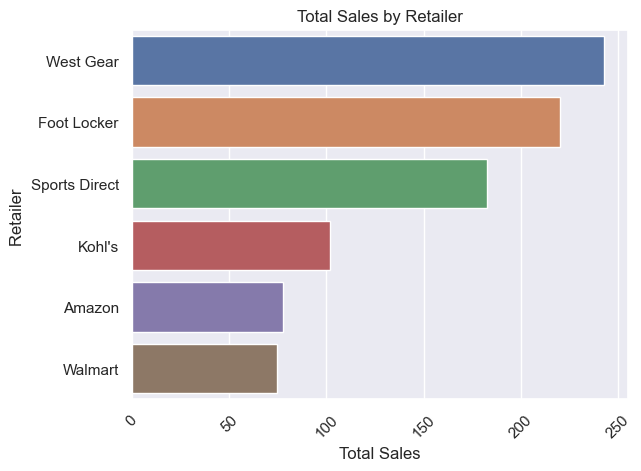

In [50]:
# Set the Seaborn style
sns.set(style='darkgrid')

sns.barplot(x='Total Sales',y='Retailer', data=df,orient='h')

# Set the labels and title
plt.xlabel('Total Sales' )
plt.ylabel('Retailer ')
plt.title('Total Sales by Retailer')

# Rotate x-axis labels for better readability if necessary
plt.xticks(rotation=45)

# Show the plot
plt.show()

In [51]:
sales_per_region = (adidas_sales.groupby('Region')['Total Sales'].sum().sort_values(ascending = False)/1000000).round(2)

sales_per_region

Region
West         269.94
Northeast    186.32
Southeast    163.17
South        144.66
Midwest      135.80
Name: Total Sales, dtype: float64

### Total sales by Region

In [52]:
#getting the total sales by region
sales_per_region = (adidas_sales.groupby('Region')['Total Sales'].sum().sort_values(ascending = False)/1000000).round(2)

sales_per_region_df = pd.DataFrame({'Region':sales_per_region.index,'Total Sales':sales_per_region.values})


,Region,Total Sales
0,West,269.94
1,Northeast,186.32
2,Southeast,163.17
3,South,144.66
4,Midwest,135.80


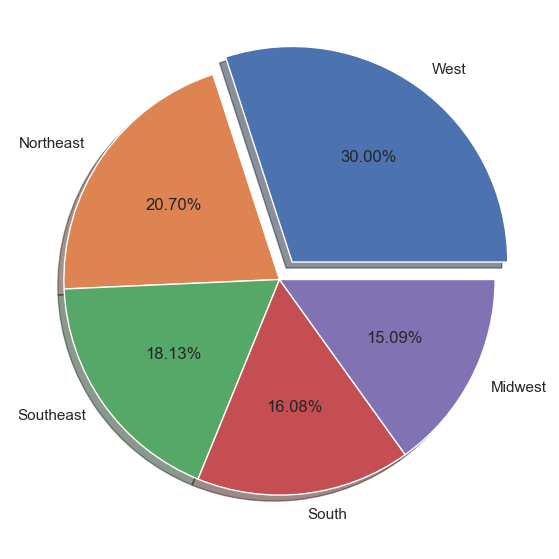

In [53]:
plt.figure(figsize=(10,7))
plt.pie(data=sales_per_region_df, x='Total Sales',labels='Region',autopct='%1.2f%%',explode=[0.1,0,0,0,0],shadow=True)

plt.show()

### Sales method and in reltation to units sold

In [54]:
#adidas_sales.head(5)

### Top selling Products

In [55]:
top_sales_method = (pd.pivot_table(data=adidas_sales,index='Product',values='Total Sales',aggfunc='sum')/1000000).round(2).sort_values(by='Total Sales')


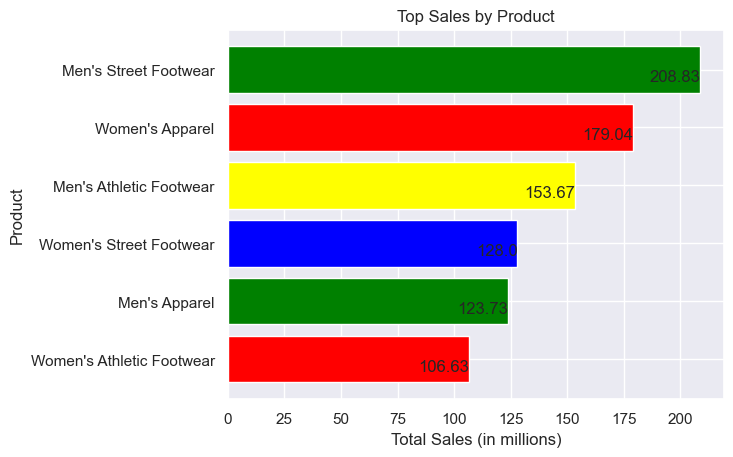

In [56]:
top_sales_method = (pd.pivot_table(data=adidas_sales, index='Product',
                                   values='Total Sales', aggfunc='sum') / 1000000).round(2).sort_values(by='Total Sales')
color=['Red','Green','blue','Yellow']


plt.barh(top_sales_method.index, top_sales_method['Total Sales'],color=color)

# Add labels to each bar
for i, v in enumerate(top_sales_method['Total Sales']):
    plt.text(v, i, str(v), ha='right', va='top')

plt.xlabel('Total Sales (in millions)')
plt.ylabel('Product')

plt.title('Top Sales by Product')

plt.show()

### Sales Method and Total number of sales

In [57]:
top_sales_method_total = (pd.pivot_table(data=adidas_sales,index='Sales Method',
                                  
                                   values='Total Sales',
                                   aggfunc='sum').sort_values(by='Total Sales')/1000000).round(2)
top_sales_method_total

,Total Sales
Sales Method,
Online,247.67
Outlet,295.59
In-store,356.64


In [58]:
type(top_sales_method_total)

pandas.core.frame.DataFrame

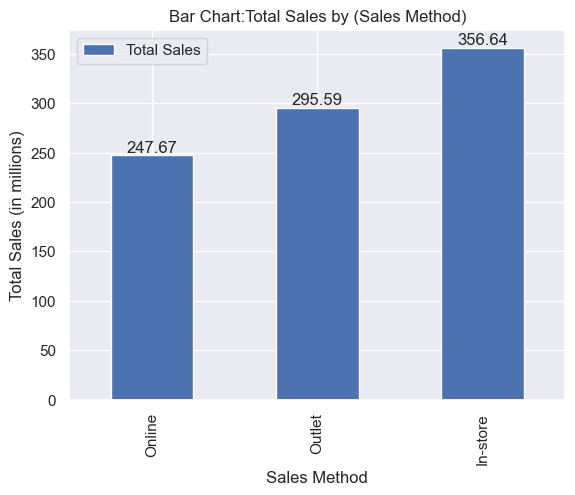

In [59]:

ax = top_sales_method_total.plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Sales Method')
plt.ylabel('Total Sales (in millions)')
plt.title('Bar Chart:Total Sales by (Sales Method)')

   
ax.bar_label(ax.containers[0], label_type='edge')
# Displaying the plot
plt.show()

### Sales method with units Sold

In [60]:
top_sales_method_units = pd.pivot_table(data=adidas_sales,index='Sales Method',
                                  
                                   values='Units Sold',
                                   aggfunc='sum').sort_values(by='Units Sold')

top_sales_method_units 

,Units Sold
Sales Method,
In-store,689990
Outlet,849778
Online,939093


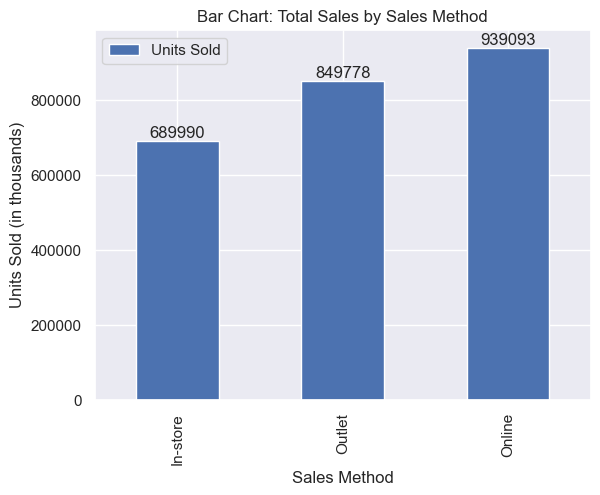

In [61]:

ax = top_sales_method_units.plot(kind='bar')

# Adding labels and title to the plot
plt.xlabel('Sales Method')
plt.ylabel('Units Sold (in thousands)')
plt.title('Bar Chart: Total Sales by Sales Method')

ax.bar_label(ax.containers[0], label_type='edge')

# Displaying the plot
plt.show()

### Number of units Sold by each Retailer

In [62]:
top_sales_method3 = pd.pivot_table(data=adidas_sales,index='Retailer',values=['Units Sold','Total Sales','Operating Profit'],aggfunc='sum')
top_sales_method3.sort_values(by='Units Sold',ascending=False)


,Operating Profit,Total Sales,Units Sold
Retailer,,,
West Gear,85667873.18,242964333.0,625262
Foot Locker,80722124.81,220094720.0,604369
Sports Direct,74332954.96,182470997.0,557640
Kohl's,36811252.58,102114753.0,287375
Walmart,25782052.61,74558410.0,206225
Amazon,28818503.31,77698912.0,197990


In [63]:
top_sales_method4 = pd.pivot_table(data=adidas_sales,index='Retailer',values=['Operating Profit'],aggfunc='sum')
top_sales_method4

,Operating Profit
Retailer,
Amazon,28818503.31
Foot Locker,80722124.81
Kohl's,36811252.58
Sports Direct,74332954.96
Walmart,25782052.61
West Gear,85667873.18


In [64]:
top_sales_method4 = pd.pivot_table(data=adidas_sales,index='Retailer',
                                   values=['Operating Profit','Units Sold','Total Sales'],
                                   aggfunc='sum').sort_values(by='Operating Profit',ascending = False)
top_sales_method4

,Operating Profit,Total Sales,Units Sold
Retailer,,,
West Gear,85667873.18,242964333.0,625262
Foot Locker,80722124.81,220094720.0,604369
Sports Direct,74332954.96,182470997.0,557640
Kohl's,36811252.58,102114753.0,287375
Amazon,28818503.31,77698912.0,197990
Walmart,25782052.61,74558410.0,206225


### The Total Sales Trends by month comparison for 2020 and 2021

In [65]:
#Group the data by year and month, and calculate the total sales for each group

monthly_sales = (pd.pivot_table(data=adidas_sales,index=['Year','month'],values='Total Sales',aggfunc='sum')/1000000).round(2)
monthly_sales

Total Sales
Year month             
2020 1            16.25
     2            15.00
     3            17.66
     4            24.61
     5            16.92
     6             8.83
     7            17.15
     8            19.88
     9            18.30
     10           10.84
     11            8.62
     12            8.03
2021 1            55.23
     2            46.10
     3            39.15
     4            47.73
     5            63.59
     6            65.92
     7            78.33
     8            72.29
     9            59.36
     10           53.07
     11           59.24
     12           77.82

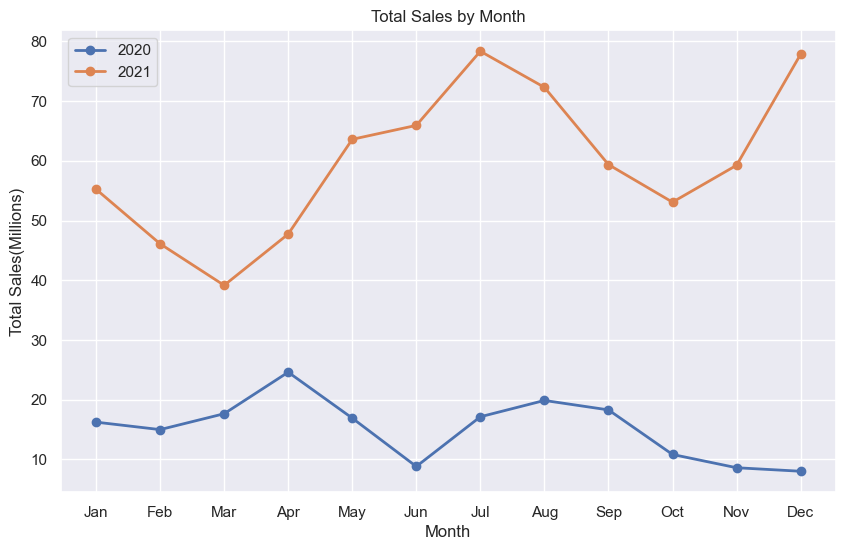

In [66]:
#Creating a line graph for the sales of 2020 and 2021
fig, ax = plt.subplots(figsize=(10, 6))

years = monthly_sales.index.get_level_values('Year').unique()

for year in years:
    # Filter the data for the current year
    year_data = monthly_sales.loc[year]
    
    # Plot a line for the current year
    ax.plot(year_data.index.get_level_values('month'), year_data['Total Sales'], marker='o', linestyle='-', linewidth=2, label=year)

ax.set_xlabel('Month')
ax.set_ylabel('Total Sales(Millions)')
ax.set_title('Total Sales by Month')


ax.set_xticks(range(1, 13))
ax.set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])

ax.legend()

plt.show()



### Top 10 Best sales by States and Retailer

In [67]:
sales_by_states_retailer = (pd.pivot_table(data=adidas_sales,index=['State','Retailer'],
                                          values='Total Sales',aggfunc='sum').sort_values(by='Total Sales', ascending=False)/1000000).round(2)
#top_sales = sales_by_states_retailer.head(10)

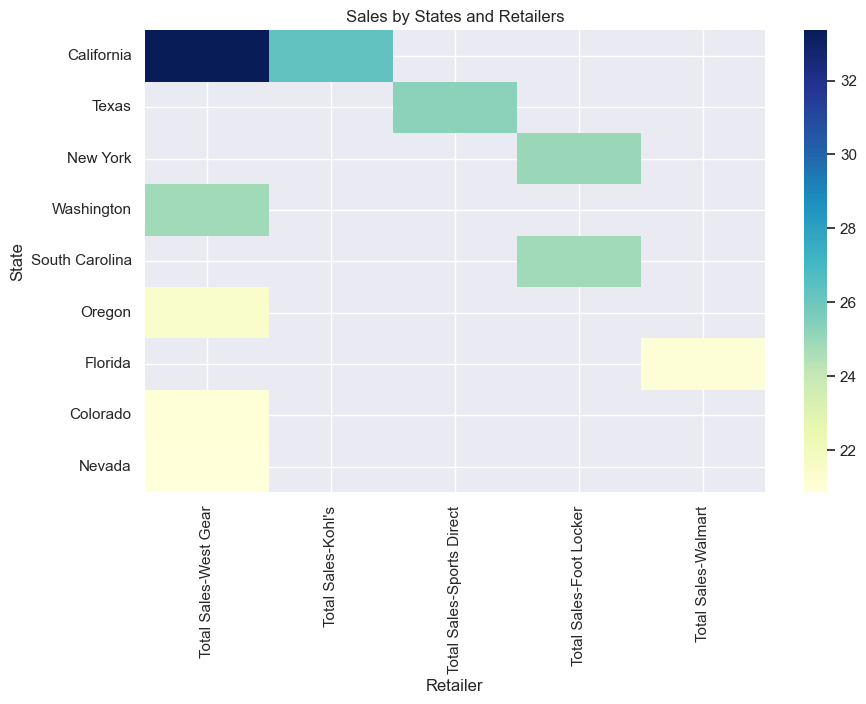

In [68]:
# Reshape the data into a pivot table format
heatmap_data = top_sales.unstack()

# Plotting the heat map
plt.figure(figsize=(10, 6))  # Adjust the figure size as per your preference
sns.heatmap(heatmap_data, cmap='YlGnBu')  # Adjust the color map (cmap) as per your preference

# Adding labels and title
plt.xlabel('Retailer')
plt.ylabel('State')
plt.title('Sales by States and Retailers')

# Displaying the chart
plt.show()

### Extracting trends Adidas for sales on weekends and weekdays

In [69]:
adidas_sales.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method,month,Year,Weekday
0,Foot Locker,1185732,2020-01-01,Northeast,New York,New York,Men's Street Footwear,50.0,1200,600000.0,300000.0,0.50,In-store,1,2020,weekday
1,Foot Locker,1185732,2020-01-02,Northeast,New York,New York,Men's Athletic Footwear,50.0,1000,500000.0,150000.0,0.30,In-store,1,2020,weekday
2,Foot Locker,1185732,2020-01-03,Northeast,New York,New York,Women's Street Footwear,40.0,1000,400000.0,140000.0,0.35,In-store,1,2020,weekday
3,Foot Locker,1185732,2020-01-04,Northeast,New York,New York,Women's Athletic Footwear,45.0,850,382500.0,133875.0,0.35,In-store,1,2020,weekend
4,Foot Locker,1185732,2020-01-05,Northeast,New York,New York,Men's Apparel,60.0,900,540000.0,162000.0,0.30,In-store,1,2020,weekend


In [70]:

adidas_sales['Weekday']= adidas_sales['Invoice Date'].dt.weekday < 5
#mapping each the boolean values to either weekend or weekday

adidas_sales['Weekday'] = adidas_sales['Weekday'].map({True: 'weekday', False: 'weekend'})

In [71]:
Day_of_week_sales = (pd.pivot_table(data=adidas_sales,index=['month','Weekday'],values='Total Sales',
                                   aggfunc='sum')/1000000).round(2)
Day_of_week_sales
#Extracting the weekday and weekend from the date column

#adidas_sales['Weekday']= adidas_sales['Invoice Date'].dt.weekday < 5
#mapping each the boolean values to either weekend or weekday

#adidas_sales['Weekday'] = adidas_sales['Weekday'].map({True: 'weekday', False: 'weekend'})

Total Sales
month Weekday             
1     weekday        45.07
      weekend        26.41
2     weekday        48.01
      weekend        13.09
3     weekday        44.71
      weekend        12.10
4     weekday        48.12
      weekend        24.22
5     weekday        57.38
      weekend        23.12
6     weekday        59.13
      weekend        15.62
7     weekday        76.99
      weekend        18.49
8     weekday        73.19
      weekend        18.98
9     weekday        52.97
      weekend        24.70
10    weekday        42.59
      weekend        21.32
11    weekday        48.44
      weekend        19.42
12    weekday        65.35
      weekend        20.49

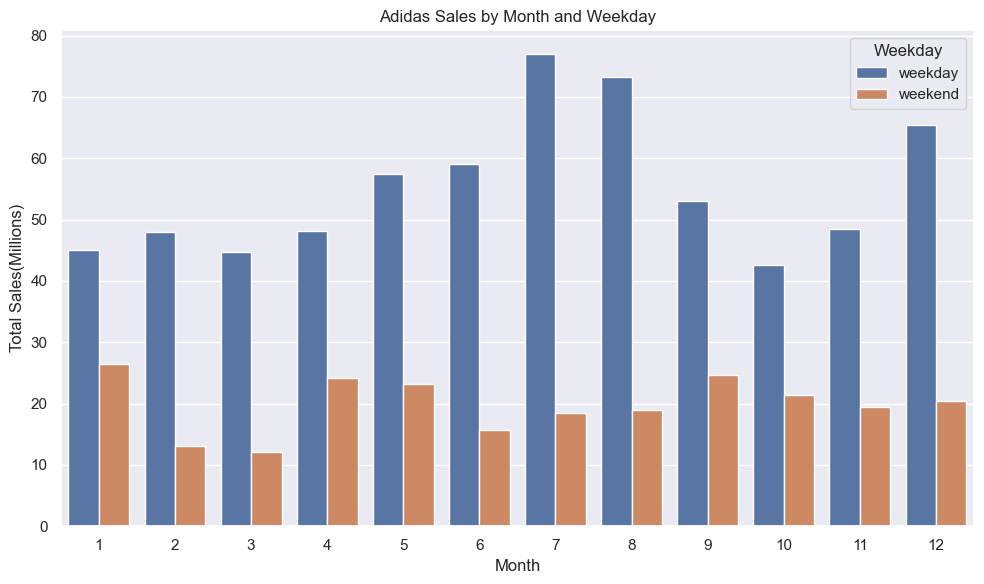

In [72]:

# Convert the data into a DataFrame
df = pd.DataFrame(Day_of_week_sales)
df.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(data=df, x='month', y='Total Sales', hue='Weekday')

# Customize the chart
plt.xlabel('Month')
plt.ylabel('Total Sales(Millions)')
plt.title('Adidas Sales by Month and Weekday')
plt.legend(title='Weekday', loc='upper right')

plt.tight_layout()
plt.show()

## Conclusion

After doing our analysis we have a few observations to make that answers some of our questions.
1. WestGear and Footlocker are the two best-performing Retailers in terms of Total Sales for the years 2020 and 2021
2. West Region has the highest percentage of Total Sales 30 percent of the total sales.
3. Mens Street Footwear has the highest number of sales.
4. Instore Sales method, is the method that has the highest number of total sales in that period.
5. WestGear has the Best performing Retailers with five of them appearing in the Top 10 of the best-performing Retailers.
6. For the years 2020 and 2021, weekday has been the most active days in terms of sales as compared to the weekends